In [1]:
import pandas as pd
import numpy as np
import polars as pl
import pyarrow as pa

**Goal**: 

A quick introduction to Polars, a new DataFrame library. ~~Later we will compare the performance of Polars with Pandas. ~~

**Links**:
- [discovering polars library](https://python.plainenglish.io/discovering-polars-library-1d63c1eefb44)
- [polars user guide](https://pola-rs.github.io/polars-book/user-guide/#philosophy)


### Polars introduction
- 2020, Ritchie Vink
- Written in Rust
- Uses all CPU cores available

Polars is a lightning-fast DataFrame library for Rust and Python. Built from ground up in Rust and uses Apache Arrow implementation. 

Dask, Modin are other libraries that are built on top of Pandas. Polars is built from ground up and is not a wrapper around Pandas.

- optimizes queries to reduce unneeded memomry allocations 
- reduces redudant copies 
- processes data in chunks and uses all available cores - parallel execution
- supports lazy evaluation - query is executed only when the result is needed (has eager evaluation as well similar to pandas)

#### Load data
Polars also supports most of the major I/O formats like csv, json, parquet, database etc.


Dateset: Chicago crime records from the Chicago Police Department [Data Source](https://data.cityofchicago.org/Public-Safety/Crimes-2022/9hwr-2zxp)

In [3]:
file_path = "ChicagoCrimes2022.csv"  # Partial 2022 data 01 Jan to 22 August 2022
# file_path = "Crimes_-_2001_to_Present.csv" # Full data from Jan 2018 to 12 June 2023 

df = pl.read_csv(file_path)
df.head()

ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
i64,str,str,str,str,str,str,str,bool,bool,i64,i64,i64,i64,str,i64,i64,i64,str,f64,f64,str
12751203,"""JF305497""","""07/04/2022 10:…","""004XX E 40TH S…","""1310""","""CRIMINAL DAMAG…","""TO PROPERTY""","""APARTMENT""",true,true,214,2,3,38,"""14""",1180017,1878243,2022,"""07/24/2022 04:…",41.82117,-87.615115,"""(41.821170402,…"
12756673,"""JF312128""","""07/10/2022 11:…","""039XX W CHICAG…","""0430""","""BATTERY""","""AGGRAVATED - O…","""RESTAURANT""",false,false,1112,11,37,23,"""04B""",1149770,1905050,2022,"""07/24/2022 04:…",41.895372,-87.725381,"""(41.895372283,…"
12768448,"""JF326144""","""06/24/2022 12:…","""081XX S GREEN …","""1150""","""DECEPTIVE PRAC…","""CREDIT CARD FR…","""APARTMENT""",false,false,613,6,21,71,"""11""",1172054,1850887,2022,"""07/24/2022 04:…",41.746281,-87.645131,"""(41.746281377,…"
12767303,"""JF324716""","""07/17/2022 05:…","""045XX S DREXEL…","""0820""","""THEFT""","""$500 AND UNDER…","""RESIDENCE - PO…",false,false,222,2,4,39,"""06""",1183084,1875126,2022,"""07/24/2022 04:…",41.812546,-87.603961,"""(41.812546224,…"
12763448,"""JF320476""","""07/17/2022 08:…","""032XX N CLARK …","""0860""","""THEFT""","""RETAIL THEFT""","""DEPARTMENT STO…",false,false,1924,19,44,6,"""06""",1169868,1921628,2022,"""07/24/2022 04:…",41.940449,-87.651082,"""(41.94044868, …"


In [5]:
# get the number of rows in the dataframe
len(df)

143185

In [6]:
# get the data types of teh columns 
df.dtypes

[Int64,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Boolean,
 Boolean,
 Int64,
 Int64,
 Int64,
 Int64,
 Utf8,
 Int64,
 Int64,
 Int64,
 Utf8,
 Float64,
 Float64,
 Utf8]

In [9]:
# polars pretty prints the dataframe
print(df.head(2))

shape: (2, 22)
┌──────────┬───────────┬────────────┬───────────┬───┬──────────┬───────────┬───────────┬───────────┐
│ ID       ┆ Case      ┆ Date       ┆ Block     ┆ … ┆ Updated  ┆ Latitude  ┆ Longitude ┆ Location  │
│ ---      ┆ Number    ┆ ---        ┆ ---       ┆   ┆ On       ┆ ---       ┆ ---       ┆ ---       │
│ i64      ┆ ---       ┆ str        ┆ str       ┆   ┆ ---      ┆ f64       ┆ f64       ┆ str       │
│          ┆ str       ┆            ┆           ┆   ┆ str      ┆           ┆           ┆           │
╞══════════╪═══════════╪════════════╪═══════════╪═══╪══════════╪═══════════╪═══════════╪═══════════╡
│ 12751203 ┆ JF305497  ┆ 07/04/2022 ┆ 004XX E   ┆ … ┆ 07/24/20 ┆ 41.82117  ┆ -87.61511 ┆ (41.82117 │
│          ┆           ┆ 10:57:00   ┆ 40TH ST   ┆   ┆ 22       ┆           ┆ 5         ┆ 0402, -87 │
│          ┆           ┆ PM         ┆           ┆   ┆ 04:47:33 ┆           ┆           ┆ .61511542 │
│          ┆           ┆            ┆           ┆   ┆ PM       ┆           ┆

In [60]:
# %%timeit

# get the value counts by type of case 
df['Primary Type'].value_counts()

7.46 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
# can create expressions independent of the dataframe
num_arrests = (pl.col('Arrest').sum())
num_arrests

In [26]:
# apply an expression to the dataframe using select 
print(df.select(num_arrests))

shape: (1, 1)
┌────────┐
│ Arrest │
│ ---    │
│ u32    │
╞════════╡
│ 16931  │
└────────┘


In [53]:
plan = (
        df
        .lazy()
        .filter(pl.col('Block').str.contains('VAN BUREN'))
        .groupby('Primary Type')
        .agg([num_arrests.alias('num_arrests')])
        .sort('num_arrests', descending=True)
        .head(5)
    )

In [58]:
plan.explain(optimized=True)

'SORT BY [col("num_arrests")]\n  AGGREGATE\n  \t[col("Arrest").sum().alias("num_arrests")] BY [col("Primary Type")] FROM\n  \tDF ["ID", "Case Number", "Date", "Block"]; PROJECT 3/22 COLUMNS; SELECTION: "col(\\"Block\\").str.contains([Utf8(VAN BUREN)])"'

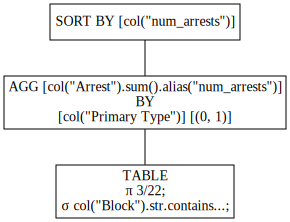

In [57]:
plan.show_graph(optimized=True)

In [56]:
plan.collect()

Primary Type,num_arrests
str,u32
"""NARCOTICS""",33
"""WEAPONS VIOLAT…",11
"""BATTERY""",7
"""OTHER OFFENSE""",5
"""CRIMINAL TRESP…",2


In [64]:
%%timeit
(
    df
    .lazy()
    .filter(pl.col('Block').str.contains('VAN BUREN'))
    .groupby('Primary Type')
    .agg([num_arrests.alias('num_arrests')])
    .sort('num_arrests', descending=True)
    .head(5)
    .collect()
)

12.1 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [63]:
%%timeit
(
    df
    .filter(pl.col('Block').str.contains('VAN BUREN'))
    .groupby('Primary Type')
    .agg([num_arrests.alias('num_arrests')])
    .sort('num_arrests', descending=True)
    .head(5)
)

16.9 ms ± 2.51 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
